# DSaPP RA Exercises -- Data

### Section I -- Exploratory Analysis

In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd
matplotlib.style.use('ggplot')
import seaborn as sns

In [2]:
#Load the data
#I'm not loading donations (for now) since I think it's basically summarized in 'outcomes' and we don't have the info
#for donations in the test set anyway
#dn = pd.read_csv('donations.csv')
es = pd.read_csv('essays.csv')
outs = pd.read_csv('outcomes.csv')
pro = pd.read_csv('projects.csv')
res = pd.read_csv('resources.csv')

#### Notes about my approach

I've just gone through and looked at some averages and descriptions for the data in different files.  

In this notebook I'm trying to show you what the data says about exciting and non-exciting projects.  

I didn't make an attempt at constructing a model, but I was trying to see what variables might be important if one were to do so. I didn't edit much from my initial exploration.  Hopefully some of the things I looked at are informative.

#### Information about the files
##### donations.csv - contains information about the donations to each project. This is only provided for projects in the training set.
##### essays.csv - contains project text posted by the teachers. This is provided for both the training and test set.
##### projects.csv - contains information about each project. This is provided for both the training and test set.
##### resources.csv - contains information about the resources requested for each project. This is provided for both the training and test set.
##### outcomes.csv - contains information about the outcomes of projects in the training set.

In [3]:
#I won't print the headers here, but the first thing I noticed is that there are a lot 
#of columns that are T/F but they are currently denoted with strings.  
#The first thing I'm going to do is change that. 
def assign_tf_val(col):
    #This function assigns an integer to the 't'/'f' strings
    col_vals = col.values
    new_ar = []
    for jk in range(len(col_vals)):
        val = col_vals[jk]
        if val == 't':
            new_ar.append(1)
        elif val == 'f':
            new_ar.append(0)
        else:
            new_ar.append(val)
    return new_ar

In [4]:
#apply the function.  
#n_dn = dn.apply(assign_tf_val)
es = es.apply(assign_tf_val)
outs = outs.apply(assign_tf_val)
pro = pro.apply(assign_tf_val)
res = res.apply(assign_tf_val)


#### First let's look at the project information

In [5]:
#look at some descriptions
pro.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match
count,6.213620e+05,664098.000000,664098.000000,664094.000000,664098.000000,664098.000000,664098.000000,664098.000000,664098.000000,664098.000000,664098.000000,664098.000000,629016.000000,6.640980e+05,6.640980e+05,663952.000000,664098.000000,664098.000000
mean,2.608577e+11,37.240948,-93.344760,52926.452644,0.086730,0.093766,0.049738,0.014969,0.006616,0.004900,0.056843,0.017223,27.495822,5.420415e+02,6.447128e+02,97.233547,0.268563,0.057278
std,1.589754e+11,4.668155,17.761908,31193.738658,0.281439,0.291504,0.217404,0.121429,0.081072,0.069827,0.231542,0.130103,8.663046,1.267738e+04,1.545863e+04,2283.327661,0.443212,0.232373
min,1.000050e+10,18.249140,-176.634989,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000230e+11,34.038082,-112.003213,27589.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.672000e+02,3.175000e+02,22.000000,0.000000,0.000000
50%,2.615730e+11,37.662476,-87.681219,50702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,4.110000e+02,4.878400e+02,30.000000,0.000000,0.000000
75%,3.704720e+11,40.758827,-79.193091,85043.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,5.864900e+02,6.963875e+02,100.000000,1.000000,0.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.025002e+07,1.250002e+07,999999.000000,1.000000,1.000000


In [88]:
#I'm going to index the project data frame by the project id
curr_ind = pro.index.values
new_ind = pro['projectid'].values

pro.index = new_ind

#I'm also going to go ahead and do this for essays.  I can do this for both since there is only one entry
#per project in these cases.
es_inds = es['projectid'].values
es.index = es_inds


Minimum number of projects submitted by one teacher  1
Maximum number of projects by one teacher  266
Mean by one teacher  2.66112880928
Median by one teacher  1.0
Standard deviation  5.43258205341


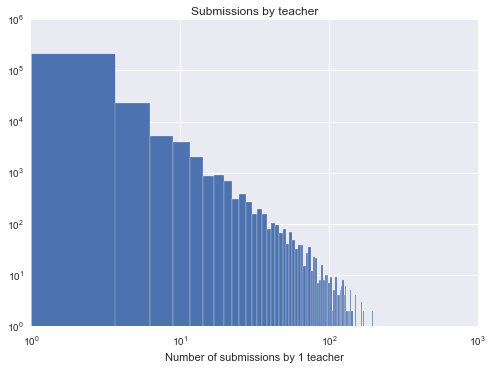

In [7]:
#do the same teachers submit multiple projects?
teacher_pro_counts = pro['teacher_acctid']
teacher_pro_counts = teacher_pro_counts.value_counts()

print 'Minimum number of projects submitted by one teacher ', np.min(teacher_pro_counts)
print 'Maximum number of projects by one teacher ' , np.max(teacher_pro_counts)
print 'Mean by one teacher ', np.mean(teacher_pro_counts)
print 'Median by one teacher ', np.median(teacher_pro_counts)
print 'Standard deviation ' ,np.std(teacher_pro_counts)

fig = plt.figure()
plt.hist(teacher_pro_counts, 100)
plt.yscale('log')
plt.xscale('log')
plt.title('Submissions by teacher')
plt.xlabel('Number of submissions by 1 teacher')
plt.show()


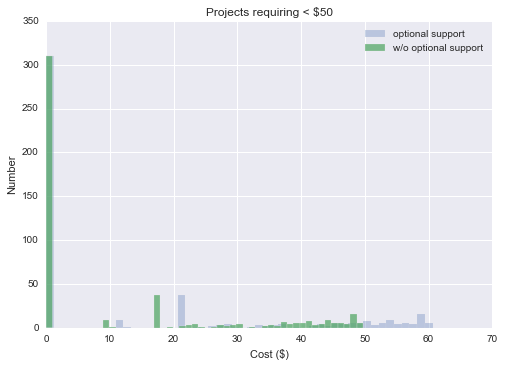

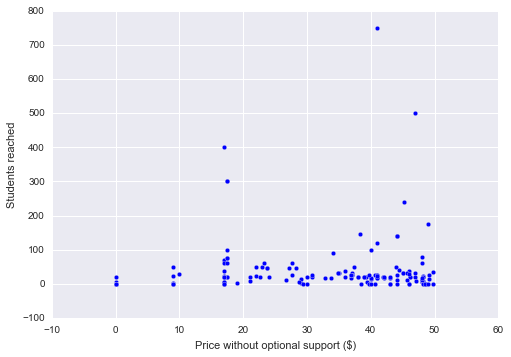

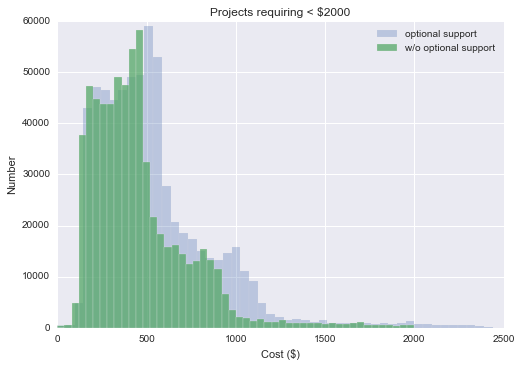

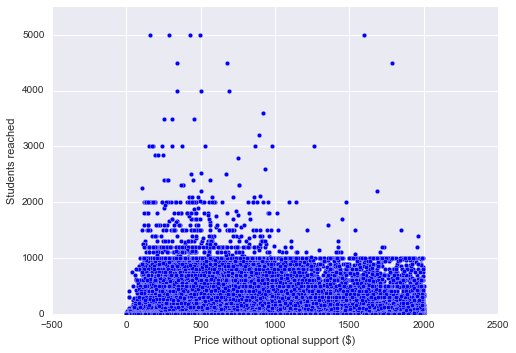

In [104]:
#The simplest thing we can start looking at is the cost and students reached and the relation between those things. 
#I'm also going to look and see if I think the data makes reasonable sense

#The first thing I notice is that most of the prices are on the order of hundreds of dollars
#but someone has asked for 12 million!  Let's look at histograms for this for different orders of magnitude of cost

#I also find it odd that some of the projects apparently require $0!
def total_price_hist(pro, ceil, title, log = False, db = 50, maxx = -1):
    tp_es = pro['total_price_excluding_optional_support'][pro['total_price_excluding_optional_support']<ceil] #total price excluding optional support
    tp_ws = pro['total_price_including_optional_support'][pro['total_price_excluding_optional_support']<ceil]
    s_re = pro['students_reached'][pro['total_price_excluding_optional_support']<ceil]
    fig = plt.figure()
    plt.hist(tp_ws, bins =db, alpha = 0.3, label = 'optional support')
    plt.hist(tp_es, bins =db, alpha = 0.75, label = 'w/o optional support')
    plt.title(title)
    if log:
        plt.yscale('log')
        plt.xscale('log')
        plt.ylim(0.01, len(tp_es))
    plt.xlabel('Cost ($)')
    plt.ylabel('Number')
    plt.legend()
    plt.show()
    
    fig = plt.figure()
    plt.scatter(tp_es, s_re)
    plt.xlabel('Price without optional support ($)')
    plt.ylabel('Students reached')
    if maxx != -1:
        plt.ylim(0, maxx)
    if log:
        plt.yscale('log')
        plt.xscale('log')
        plt.ylim(0.01, len(tp_es))
    plt.show()
    

total_price_hist(pro, 50, 'Projects requiring < $50')
total_price_hist(pro, 2*10**3, 'Projects requiring < $2000', maxx = 5500 )


In [9]:
#I see some interesting things here.  
#Why do some projects that cost so little reach so many students? How can a project that costs <$50 reach 800 students?  
#also there are about 300 entries in my first histogram for $0 but I don't have many points in my scatter plot
#so maybe some data for number of students reached is missing?

#check this
print 'projects missing students reached ', len(pro[pro['students_reached'].isnull()])

#Actually you could see this from the count in the description table as well (count is smaller).

projects missing students reached  146


In [10]:
#since I mentioned the case that costs <$50 and reaches over 700 students, let's print that.

inds1 = pro['total_price_excluding_optional_support']<50
less_50 = pro[inds1]
less_50 = less_50[less_50['students_reached']>700]

less_50_750_id = less_50['projectid'].values

#I'm doing describe because it prints so I can see the whole table.  just printing the whole table doesn't seem to.
less_50.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match
count,1.000000e+00,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mean,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0
25%,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0
50%,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0
75%,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0
max,3.701500e+11,36.080708,-80.089661,27284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,50.0,750.0,0.0,0.0


In [11]:
#It's from North Carolina (like me! neat!)
#let's look at other info for it.  Like the resources and essay
print es.loc[less_50_750_id]['essay'].values
res[res['projectid']==less_50_750_id[0]]


[ 'This proposal will provide funding to buy the video \xe2\x80\x9cGood-Bye Mr. Chips,\xe2\x80\x9d the original movie from 1939 that tells about the life of Mr. Chipping, a Latin teacher at a very stiff and proper English boarding school who eventually wins over the minds and hearts of his students.  \r\\n\r\\nThis video is of the original Mr. Chips (1939 with Robert Donat) and tells the story almost in playwright form without all the color and special effects of films today.  It is a story told only as the films of this era (Gone with the Wind, Stagecoach, etc.) could tell in black and white and with the feel of being on stage.  \r\\n\r\\nThis video will be put into our media center here at South East Middle School for 6th through 8th graders to view as part of language arts classes.  Unlike the films of today, this film will touch the heart of every child in a way that allows them to see wonderful film-making and wonderful character roles, while demonstrating that even in the face of

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
3063225,da47c7bce322c536afd7a06f76b04b97,2a88b4ebfe7ec8302df81953ca153504,NaN,NaN,Technology,goodbye mr. chips DVD,UPC 12569583726,19.98,1.0


In [12]:
#okay, so They just think that a lot of people will watch the DVD I guess.  Nothing is really wrong with this application
#except that it seems pretty silly to me...

In [13]:
#What about the school categories?
#A few of the columns are school descriptions.  (charter, magnet, year_round, nlns, kipp, charter_ready_promise)
#Do these categories overlap?  Is it consistent for them to overlap?
m_c_overlap = pro['school_charter'] + pro['school_magnet']
print 'Both charter and magnet ', len(np.where(m_c_overlap==2)[0])

c_kipp_overlap = pro['school_charter'] + pro['school_kipp']
print 'Both charter and kipp ', len(np.where(c_kipp_overlap==2)[0])

m_kipp_overlap = pro['school_magnet'] + pro['school_kipp']
print 'Both kipp and magnet ', len(np.where(m_kipp_overlap==2)[0])

c_crp_overlap = pro['school_charter'] + pro['school_charter_ready_promise']
print 'Both charter and charter ready promise ', len(np.where(c_crp_overlap==2)[0])

Both charter and magnet  797
Both charter and kipp  4364
Both kipp and magnet  12
Both charter and charter ready promise  3237


In [14]:
#so I've learned some definitions
#kipp -- a kind of public charter school
#charter_ready_promise -- also a kind of charter school where they make some promise about college admission
#nlns -- from what I can tell this is 'new leaders for new schools' which is not specific to charter or not

#Obviously in some cases it makes sense for these things to overlap as we see above.  what wouldn't be consistent
#is if any of the schools were described as one of the specific charter categories without being listed as charter
#Also I'll note here that all these categories are specialty, so it'd be ok if a school wasn't any one of them.

#### What about outcomes and the variables above for "exciting" and "non-exciting" projects?

In [15]:
#look at descriptions
outs.describe()

,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,619326.000000,524928.000000,619326.000000,524928.000000,619326.000000,524928.000000,524928.000000,524928.000000,439487.00000,524928.000000,524928.000000
mean,0.059274,0.237480,0.695406,0.721419,0.302216,0.518886,0.719735,0.013213,52.92709,0.777339,4.361290
std,0.236137,0.425539,0.460236,0.448301,0.459219,0.499644,0.449129,0.114187,35.71410,2.227933,5.668748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.00000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,50.00000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,83.00000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.00000,151.000000,304.000000


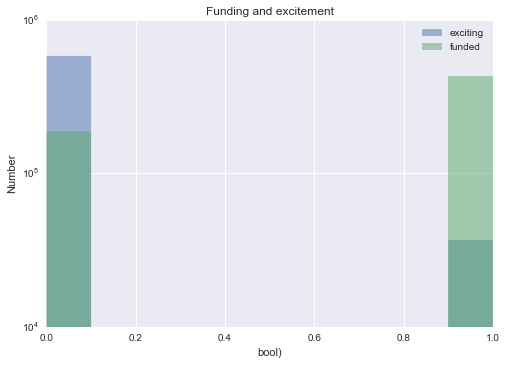

In [16]:
#We can see from the table that most projects are not deemed exciting.  Let's see in histogram format.

#We see that 'fully funded' doesn't necessarily mean 'exciting' since there are many projects that are fully funded
#but not exciting (as we expect since being fully funded is only one requirement for a project to be exciting)

outs['is_exciting'].hist(alpha = 0.5, label = 'exciting')
outs['fully_funded'].hist(alpha = 0.5, label = 'funded')
plt.yscale('log')
plt.xlabel('bool)')
plt.ylabel('Number')
plt.legend()
plt.title('Funding and excitement')
plt.show()

#### putting these two data sets together, let's look at the cost for the exciting projects vs non exciting projects and some other stuff

In [19]:
#select exciting project IDs
exciting_ids = outs['projectid'][outs['is_exciting']==1]
not_exciting = outs['projectid'][outs['is_exciting']==0]
print 'number of exciting projects', len(exciting_ids)
print 'number of projects not exciting', len(not_exciting)
print 'total ', len(exciting_ids)+len(not_exciting)
print 'length outcomes ', len(outs['projectid'].values)
print 'length projects', len(pro['projectid'].values)

tot_projects = len(pro['projectid'].values)

number of exciting projects 36710
number of projects not exciting 582616
total  619326
length outcomes  619326
length projects 664098


In [20]:
#We have more projects than are in our project set.  that's good.
#now let's get the information from the 'projects' dataframe about the interesting projects

In [22]:
exciting_pros = pro.loc[exciting_ids]
non_exc_pros = pro.loc[not_exciting]
exciting_pros.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match
count,3.347900e+04,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36700.000000,36710.000000,36710.000000
mean,2.534440e+11,37.638024,-93.615618,53051.929529,0.138218,0.091828,0.043966,0.019804,0.013321,0.007246,0.105748,0.015336,32.500899,494.522591,581.717963,88.357956,0.263825,0.056143
std,1.600295e+11,4.806891,18.308206,31686.512429,0.345134,0.288787,0.205023,0.139328,0.114645,0.084816,0.307519,0.122889,2.664202,626.847128,737.537201,138.895246,0.440711,0.230200
min,1.000050e+10,19.061771,-171.690554,1030.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,89.120000,104.850000,1.000000,0.000000,0.000000
25%,9.004500e+10,34.132997,-112.332504,24112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,298.152500,350.542500,23.000000,0.000000,0.000000
50%,2.400330e+11,38.104591,-87.688478,53207.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,417.395000,491.050000,31.000000,0.000000,0.000000
75%,3.703960e+11,40.827391,-78.433235,86887.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,569.777500,670.297500,100.000000,1.000000,0.000000
max,5.900126e+11,65.672562,-67.860942,99901.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,57617.240000,67784.990000,999.000000,1.000000,1.000000


In [23]:
non_exc_pros.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match
count,5.469990e+05,582616.000000,582616.000000,582612.000000,582616.000000,582616.000000,582616.000000,582616.000000,582616.000000,582616.000000,582616.000000,582616.000000,547534.000000,5.826160e+05,5.826160e+05,582482.000000,582616.000000,582616.000000
mean,2.618452e+11,37.205452,-93.336244,52968.922115,0.082919,0.094649,0.050520,0.015209,0.006359,0.004960,0.055273,0.018036,26.955484,5.385940e+02,6.416430e+02,98.011825,0.277435,0.060752
std,1.588335e+11,4.636172,17.719030,31176.342382,0.275760,0.292730,0.219016,0.122383,0.079491,0.070255,0.228513,0.133081,9.124507,1.353225e+04,1.650127e+04,2437.157643,0.447733,0.238875
min,1.000050e+10,18.249140,-176.634989,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000810e+11,34.036602,-112.002098,27597.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.647275e+02,3.153500e+02,22.000000,0.000000,0.000000
50%,2.629520e+11,37.563423,-87.683356,52233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,4.101800e+02,4.875600e+02,30.000000,0.000000,0.000000
75%,3.704720e+11,40.755025,-79.193091,85043.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,5.810700e+02,6.911300e+02,100.000000,1.000000,0.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.025002e+07,1.250002e+07,999999.000000,1.000000,1.000000


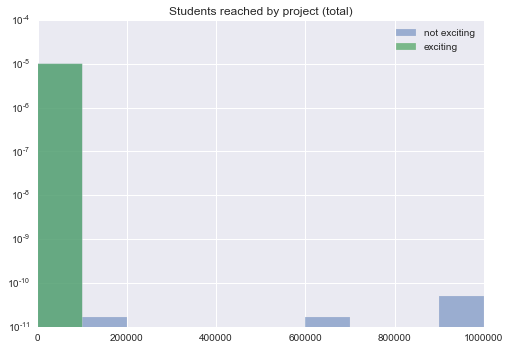

In [27]:
#We can see a few interesting things from the averages above
#There are more charter schools in the exciting projects.  
#Number of magnet schools are about the same
#More of the exciting projects are from teach for america teachers
#double your impoact and almost home don't seem to affect whether or not a project is exciting since they're 
#basically the same for both tables.

ex_st_r = exciting_pros['students_reached'].values
nex_st_r  = non_exc_pros['students_reached'].values


ex_st_r = ex_st_r[ex_st_r>=0]
nex_st_r = nex_st_r[nex_st_r >= 0]

fig = plt.figure()
n, b, p = plt.hist(nex_st_r, normed = True, alpha = 0.5, label = 'not exciting')
plt.hist(ex_st_r, bins =b, normed = True, alpha = 0.75, label='exciting')
plt.legend()
plt.yscale('log')
plt.title('Students reached by project (total)')
plt.ylabel('Number of students')
plt.show()

#obviously there's a difference at the higher numbers

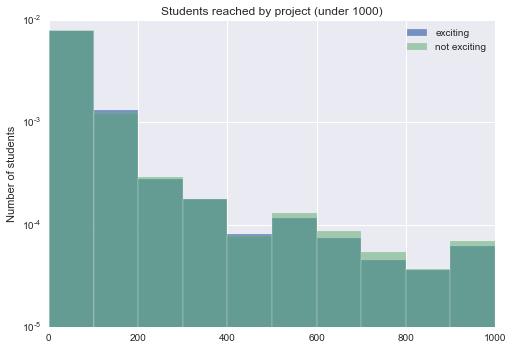

In [29]:
fig = plt.figure()
n, b, p = plt.hist(ex_st_r, normed = True, alpha = 0.75, label='exciting')
plt.hist(nex_st_r, bins = b, normed = True, alpha = 0.5, label = 'not exciting')
plt.legend()
plt.yscale('log')
plt.title('Students reached by project (under 1000)')
plt.ylabel('Number of students')
plt.show()

#not much of a difference below 1000 students though

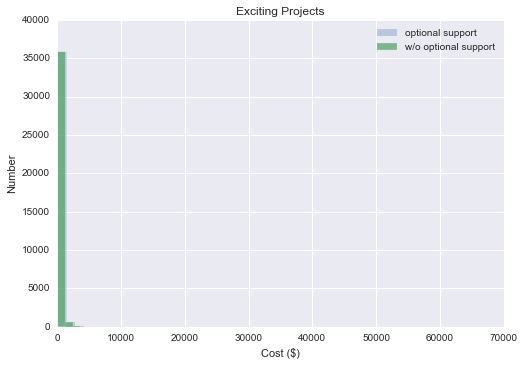

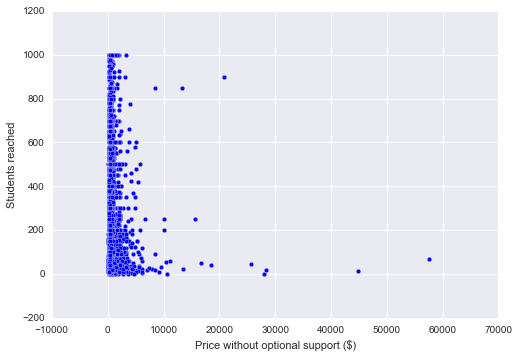

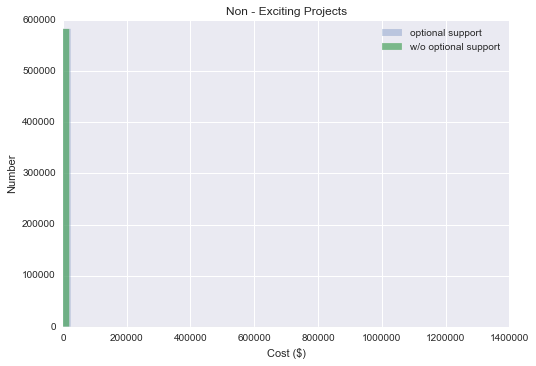

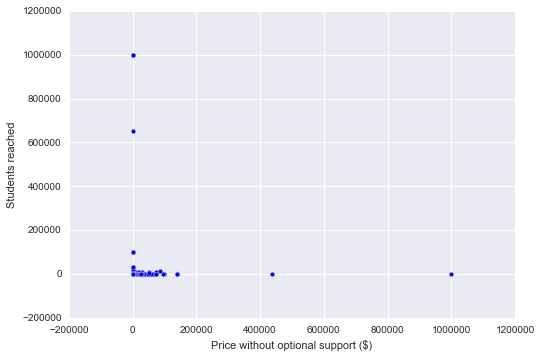

In [105]:
total_price_hist(exciting_pros, 2*10**6, 'Exciting Projects')
total_price_hist(non_exc_pros, 2*10**6, 'Non - Exciting Projects')

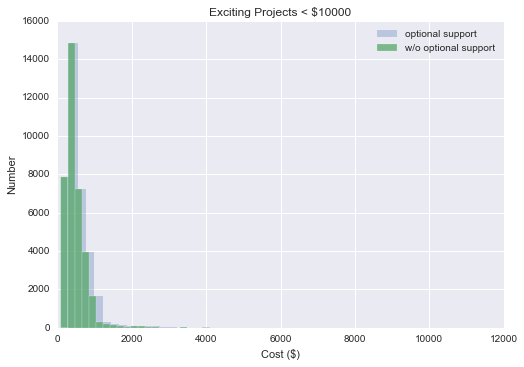

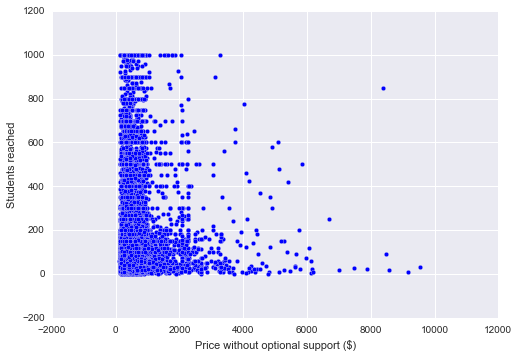

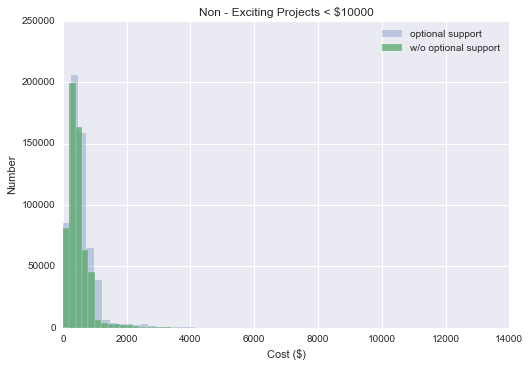

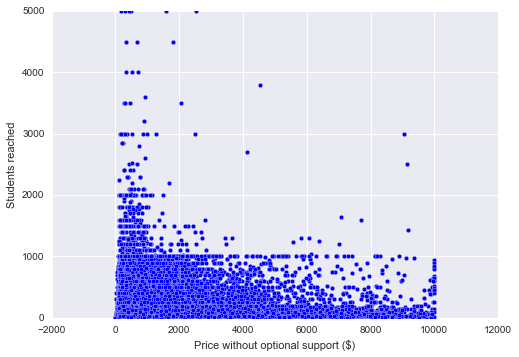

In [106]:
#Most exciting projects cost relatively little. All are under 10**5 and most are less than $10k
#all exciting projects reach less than 1000 students. 
#let's look at these for plots with ranges that are more reasonable

total_price_hist(exciting_pros, 10000, 'Exciting Projects < $10000')
total_price_hist(non_exc_pros, 10000, 'Non - Exciting Projects < $10000', maxx = 5000)

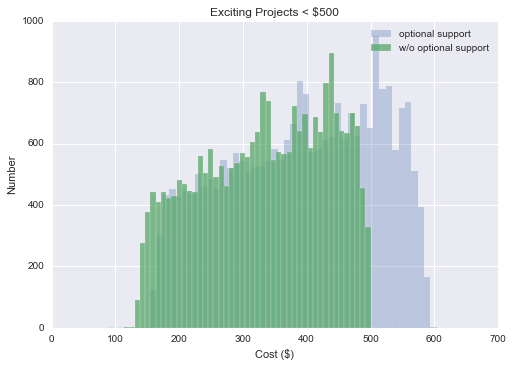

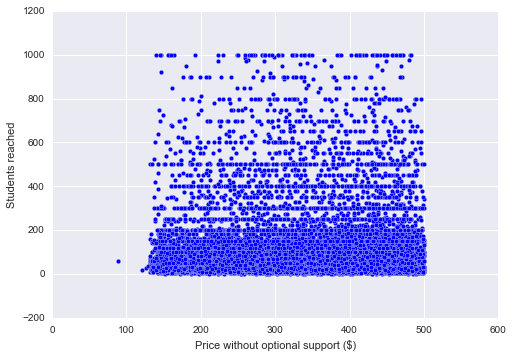

In [32]:
#difference we can see above: if a project costs more than $2000 it is likely to be not exciting if it doesn't
#reach a smaller amount of students (<200)
#also seems to not be exciting if it claims to reach over 1000 students at all.

#exciting projects also usually ever cost less than about $150
total_price_hist(exciting_pros, 500, 'Exciting Projects < $500')

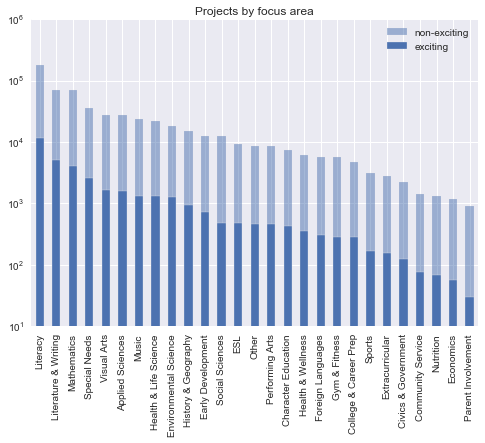

In [107]:
#The students reached vs cost looks different for exciting and non exciting projects.  
#Exciting projects are more skewed to be cheaper (probably not surprising since fully funded is a requirement to be exciting).
#one of the things I find interesting here is that the expensive exciting projects tend to reach
#fewer students
#None of the exciting projects attempt to reach more than 1000 students

#there are a lot of other things we could look at in this data. 
#what about the focus area?  
#Are some focus areas more exciting than others?
#Are some categories of resource need more exciting than others?
#Are exciting projects more likely to be from urban or rural schools?
#Do teacher characteristics affect whether a project is exciting?

#Let's look at focus area first
non_exc_pros['primary_focus_subject'].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'non-exciting')
exciting_pros['primary_focus_subject'].value_counts().plot(kind = 'bar', label = 'exciting')
plt.legend()
plt.yscale('log')
plt.title('Projects by focus area')




In [35]:
#The most common categories are the same for exciting and non exciting projects, 
#so it's probably not that important for predicting excitement.

urban       20679
suburban     8281
rural        3362
Name: school_metro, dtype: int64

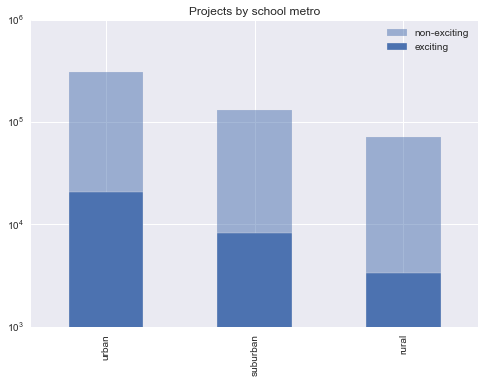

In [84]:
#urban/rural?
non_exc_pros['school_metro'].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'non-exciting')
exciting_pros['school_metro'].value_counts().plot(kind = 'bar', label = 'exciting')

plt.legend()
plt.yscale('log')
plt.title('Projects by school metro')
exciting_pros['school_metro'].value_counts()

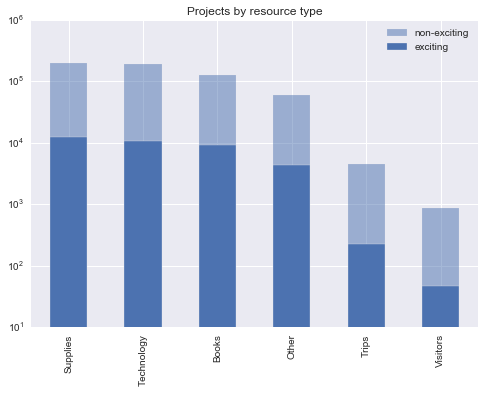

In [85]:
#Exciting doesn't seem to depend on school metro.  Instead just looks like it matches overall statistics.

#what about resource type?
non_exc_pros['resource_type'].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'non-exciting')
exciting_pros['resource_type'].value_counts().plot(kind = 'bar', label = 'exciting')

plt.legend()
plt.yscale('log')
exciting_pros['resource_type'].value_counts()
plt.title('Projects by resource type')

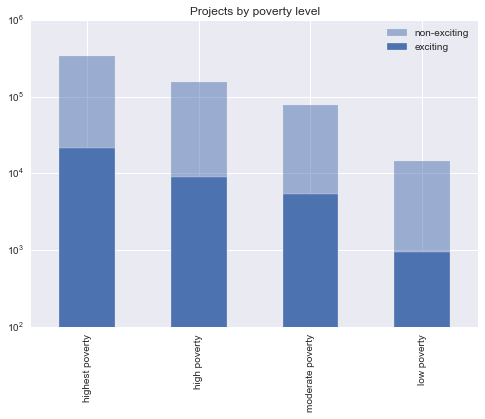

In [86]:
#Doesn't seem to be different for the two types

#what about poverty level?
non_exc_pros['poverty_level'].value_counts().plot(kind = 'bar', alpha = 0.5, label = 'non-exciting')
exciting_pros['poverty_level'].value_counts().plot(kind = 'bar', label = 'exciting')

plt.legend()
plt.yscale('log')
exciting_pros['poverty_level'].value_counts()
plt.title('Projects by poverty level')

In [42]:
#probably would be more helpful to normalize
normed_non_ex = non_exc_pros['poverty_level'].value_counts()/len(non_exc_pros['poverty_level'].values)
normed_ex = exciting_pros['poverty_level'].value_counts()/len(exciting_pros['poverty_level'].values)


In [43]:
print normed_non_ex
print  ' '
print normed_ex
#yep, these are basically the same 
#so none of these things I looked at about the project seem to matter much at all.  (besides money and students reached)
#I thought this was really interesting.  The poverty level doesn't seem to affect wheter or not a project is exciting at all.

highest poverty     0.578122
high poverty        0.262537
moderate poverty    0.134761
low poverty         0.024581
Name: poverty_level, dtype: float64
 
highest poverty     0.585699
high poverty        0.244593
moderate poverty    0.143912
low poverty         0.025797
Name: poverty_level, dtype: float64


In [87]:
#what about grade level? -- seems to the same distribtuion for exciting and non-exciting projects, more or less.

#probably would be more helpful to normalize
normed_non_ex_gl = non_exc_pros['grade_level'].value_counts()/len(non_exc_pros['grade_level'].values)
normed_ex_gl = exciting_pros['grade_level'].value_counts()/len(exciting_pros['grade_level'].values)

print 'non-exciting projects'
print normed_non_ex_gl
print ' '
print 'exciting projects'
print normed_ex_gl

non-exciting projects
Grades PreK-2    0.368958
Grades 3-5       0.309025
Grades 6-8       0.172216
Grades 9-12      0.149788
Name: grade_level, dtype: float64
 
exciting projects
Grades PreK-2    0.375157
Grades 3-5       0.289921
Grades 6-8       0.180360
Grades 9-12      0.154563
Name: grade_level, dtype: float64


In [44]:
#resources -- Do exciting projects request fewer resources? Less expensive resources?
num_for_project = res['projectid'].value_counts()

num_for_project.describe()

count    663773.000000
mean          5.524806
std           8.524455
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max         294.000000
Name: projectid, dtype: float64

In [45]:
#most projects need few resourses, but at least one listed 294!
#we also see that all projects asked for at least one resource. 
#Since monetary cost is different than resources, maybe this is why some of our projects have $0 cost.  Probably just ask 
#for resources
#another interesting thing would be to look at cost of resource for exciting/non-exciting projects

#Also some projects are missing resource requests, but not many.
print 'projects missing resource requests: ', len(pro['projectid'].values) - len(num_for_project)
print 'as a percentage of total projects: ', 100*(len(pro['projectid'].values) - len(num_for_project))/float(len(pro['projectid'].values))


projects missing resource requests:  325
as a percentage of total projects:  0.0489385602727


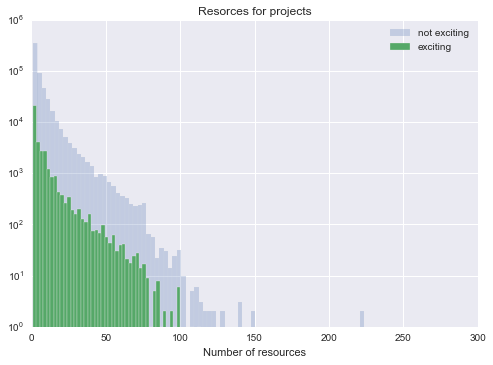

In [46]:
#separate for exciting and non exciting projects
exciting_num_res = num_for_project.loc[exciting_ids]
non_exc_num_res = num_for_project.loc[not_exciting]

#here I run into a problem because I think there are some entries missing for this field in the non exciting projects
#going to take where they're above 0

vv = non_exc_num_res.values
vv = vv[vv>0]

fig = plt.figure()
plt.hist(vv, bins = 100, alpha = 0.25, label = 'not exciting')
plt.hist(exciting_num_res.values, bins = 100, label = 'exciting')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of resources')
plt.title('Resorces for projects')
plt.show()

In [47]:
#okay so from above we see that all exciting projects ask for fewer than 100 resources.  
#what about resource cost? -- for another time


In [49]:
#I'm not going to try to analyze the essays, but maybe I could do a little. 
#Let's look at essay word count


#Function to find the length of the essays
def word_count(essay):
    words = essay.split(' ')
    return len(words)


In [50]:
#there are space for as many essays as projects, but some essays are null
print 'essay entries ', len(es)
print 'total projects ', tot_projects
print 'Projects with no essays ', len(es[es['essay'].isnull()])

essay entries  664098
total projects  664098
Projects with no essays  3


In [51]:
#in order to use this data, I'm going to insert emptry strings for these
es = es.fillna(' ')

In [52]:
exciting_essays = es.loc[exciting_ids]
non_exc_essays = es.loc[not_exciting]
exciting_essays['essay_word_count'] = exciting_essays['essay'].apply(word_count)
non_exc_essays['essay_word_count'] = non_exc_essays['essay'].apply(word_count)


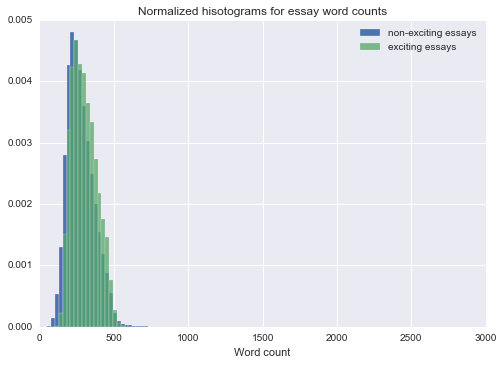

In [53]:
non_e_c = non_exc_essays['essay_word_count'].values
e_c = exciting_essays['essay_word_count'].values

fig = plt.figure()
n, b, p = plt.hist(non_e_c, bins = 100, label= 'non-exciting essays', normed = True)
plt.hist(e_c, bins = b, label = 'exciting essays', normed = True, alpha = 0.75)
plt.legend()
plt.xlabel('Word count')
plt.title('Normalized hisotograms for essay word counts')
plt.show()

In [54]:
print 'mean/std for non exciting word count', np.mean(non_e_c), np.std(non_e_c)
print 'mean/std for exciting word count', np.mean(e_c), np.std(e_c)



mean/std for non exciting word count 278.008348552 89.4615944517
mean/std for exciting word count 303.0224462 82.9734873627


In [55]:
#The word counts are different, but not within standard deviations of mean, so we probably can't use this.
#I suspect, with no backing, that the title/essay of the project probably is important.  
#I would imagine that things with broad sounding titles get more funding.  Maybe we shoule see if there are common title words
# for exciting projects?
# Do exciting projects use inspirational words more?

In [56]:
#let's look and see if there are common words in titles of exciting projects or if exclamation points are more common 
#as the ending title punctuation
def word_strings(essay):
    words = essay.split(' ')
    return words

def ending_punctuation(essay):
    if essay[-1] == '!':
        re = 1
    else:
        re = 0
    return re
    

In [57]:
exciting_essays['title_punc'] = exciting_essays['title'].apply(ending_punctuation)
non_exc_essays['title_punc'] = non_exc_essays['title'].apply(ending_punctuation)

In [58]:
print exciting_essays['title_punc'].describe()
print ' '
print non_exc_essays['title_punc'].describe()
#exciting titles are a bit more likely to use an exclamation point at the end of the title.

count    36710.000000
mean         0.343966
std          0.475036
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: title_punc, dtype: float64
 
count    582616.000000
mean          0.299055
std           0.457844
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: title_punc, dtype: float64


In [59]:
exciting_essays['title_words'] = exciting_essays['title'].apply(word_strings)
non_exc_essays['title_words'] = non_exc_essays['title'].apply(word_strings)

## Section II -- A Data Story

In [60]:
#I noticed that some teachers submit quite a few projects.  Let's look at the story of the teacher who submitted the most
most_teacher_sub_id = teacher_pro_counts.index[0]
teacher_pros = pro[pro['teacher_acctid']==most_teacher_sub_id]

#was this teacher always at the same school? (No, looks like the teacher moved schools, but not very far both school are Brooklyn)
print (teacher_pros['school_zip']).value_counts()
(teacher_pros['school_ncesid']).value_counts()

11234.0    230
11212.0     36
Name: school_zip, dtype: int64


3.600153e+11    230
3.600096e+11     36
Name: school_ncesid, dtype: int64

In [61]:
#Was this teacher usually exciting?
print 'exciting project by teacher ', len(exciting_pros[exciting_pros['teacher_acctid'] == most_teacher_sub_id])
print 'non-exciting projects by teacher ', len(non_exc_pros[non_exc_pros['teacher_acctid'] == most_teacher_sub_id])
print 'evaluated projects by teacher ', len(exciting_pros[exciting_pros['teacher_acctid'] == most_teacher_sub_id])+len(non_exc_pros[non_exc_pros['teacher_acctid'] == most_teacher_sub_id])


exciting project by teacher  4
non-exciting projects by teacher  242
evaluated projects by teacher  246


In [62]:
#the total number of projects submitted is more, so we can tell that this teacher has some projects in the test set still
#Let's see if the teacher's exciting projects are what we would expect as far as price and students reached
most_sub_exc = exciting_pros[exciting_pros['teacher_acctid'] == most_teacher_sub_id]
most_sub_nexc = non_exc_pros[non_exc_pros['teacher_acctid'] == most_teacher_sub_id]

In [67]:
print np.mean(most_sub_exc['total_price_excluding_optional_support'])
print np.mean(most_sub_nexc['total_price_excluding_optional_support'])

793.7525
530.35731405


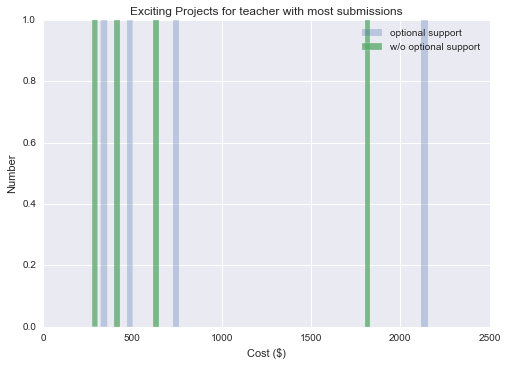

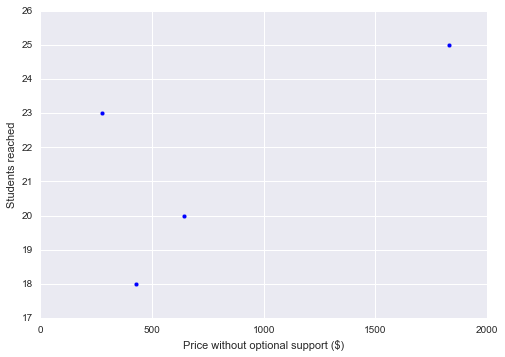

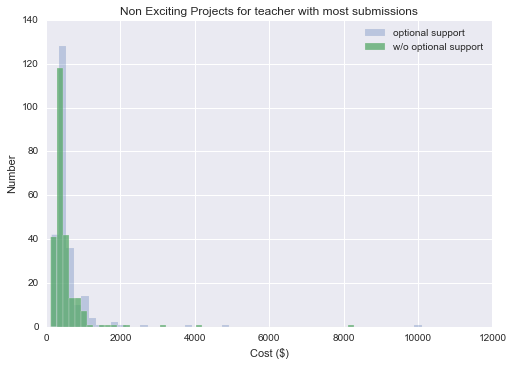

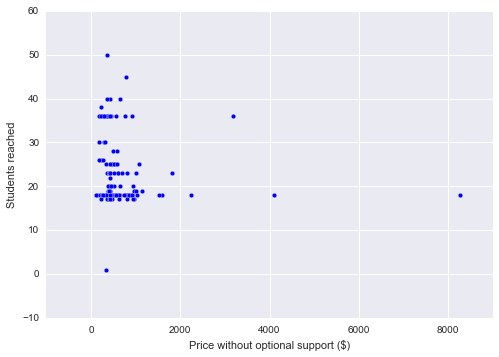

In [63]:
total_price_hist(most_sub_exc, 5000, 'Exciting Projects for teacher with most submissions')
total_price_hist(most_sub_nexc, 50000, 'Non Exciting Projects for teacher with most submissions')

In [76]:
#the projects that are exciting seem like they fit in the general pattern that we saw earlier: relatively cheap 
#and reaching a few students.  None of the more expensive projects are exciting
#Although, I admit that we can't differentiate most of the non-exciting projects from what I've found out so far. 

#other things I'd like to do here: I suspect that analyzing the title and essay is really important in determining
#whether or not somethign will be exciting.  I just don't think I have the time to do it for this submission.

#anyway, all of the exciting projects from this teacher were asking for small amounts of money except for 1. 
#let's look at that one
expensive_id = most_sub_exc[most_sub_exc['total_price_excluding_optional_support']>1500]['projectid']
ex_essay = es.loc[expensive_id]
print ex_essay['title'].values
print ex_essay['essay'].values

['T-Shirts to Stay Safe on Trips']
[ 'My students are eager kindergarteners. They are like sponges who soak up information and knowledge. The best way to do that is with hands-on activities, which includes trips. Now that the new year has started, we get the privilege of going on field trips like the big kids.\r\\n\r\\nThis is the first year of school for many of my students. They are very excited about learning and I am glad that I have a hand in their early education. For many of my students, the places that we are visiting such as the zoos, museums, farms, and shows will be the first time that they will be experiencing this.\r\\n\r\\nWhenever we tell them that they are going on a trip soon, as with all kids, they cannot wait to go. While on these trips, we encounter many other schools from the city with their students. All schools have their designated t-shirt colors. Unfortunately many schools have shirts similar in color and all the children eventually blend in together. I want to

## Section III -- Questions

## From partner : 
How accurate are the numbers for students reached?  Is there any way to confirm if this information is correct?

Is there a way to confirm whether information about need of the school?

Why are we judging projects based on excitement?  It seems like the incentive for teachers would be to have a project be fully funded and not necessarily exciting. Do teachers know about the excitement criteria?  Are there any benefits to having an exciting project?

What methods of advertising do teachers use to get donors to look at their project? Does DonorsChoose have an option to help with this kind of thing?


## Other sources

We may be able to look at data from cities to get demographic information about the school? What are the school sizes?  


